In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/Palatino LT Bold.ttf',
 '/usr/share/fonts/Palatino LT Roman.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Medium.ttf',
 '/usr/share/fonts/Palatino LT Black.ttf',
 '/usr/share/fonts/Palatino LT Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Italic.ttf',
 '/usr/share/fonts/Palatino LT Medium.ttf',
 '/usr/share/fonts/truetype/Palatino LT Bold.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black.ttf',
 '/usr/share/fonts/Palatino LT Medium Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/Palatino LT Bold Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Roman.ttf',
 '/usr/share/fonts/truetype/Palatino LT Medium Italic

In [122]:
from solvers import util
import matplotlib.font_manager

In [123]:
# flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# names

#### We start by analyzing the comparison of computation times between DP-ILQR, regular consensus ADMM, and potential ADMM:

In [139]:
times_comparison= pd.read_excel('logs/ICRA2024_Monte_Carlo.xlsm', sheet_name='Sheet1')

In [140]:
times_comparison.columns

Index(['trial', 'dynamics', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std'],
      dtype='object')

In [141]:
# times_comparison = times_comparison.loc[times_comparison['converged']==True]

In [142]:
times_comparison = times_comparison.dropna()

In [143]:
times_comparison['SOVA_admm'].unique()

array(['DP-ILQR', 'Centralized MPC', False, True], dtype=object)

In [144]:
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager
font_family = 'Palatino LT'

In [145]:
quadrotor_times = times_comparison.loc[times_comparison['dynamics']=='quadrotor']
double_int_times = times_comparison.loc[times_comparison['dynamics']=='double_int']
unicycle_times= times_comparison.loc[times_comparison['dynamics']=='unicycle']

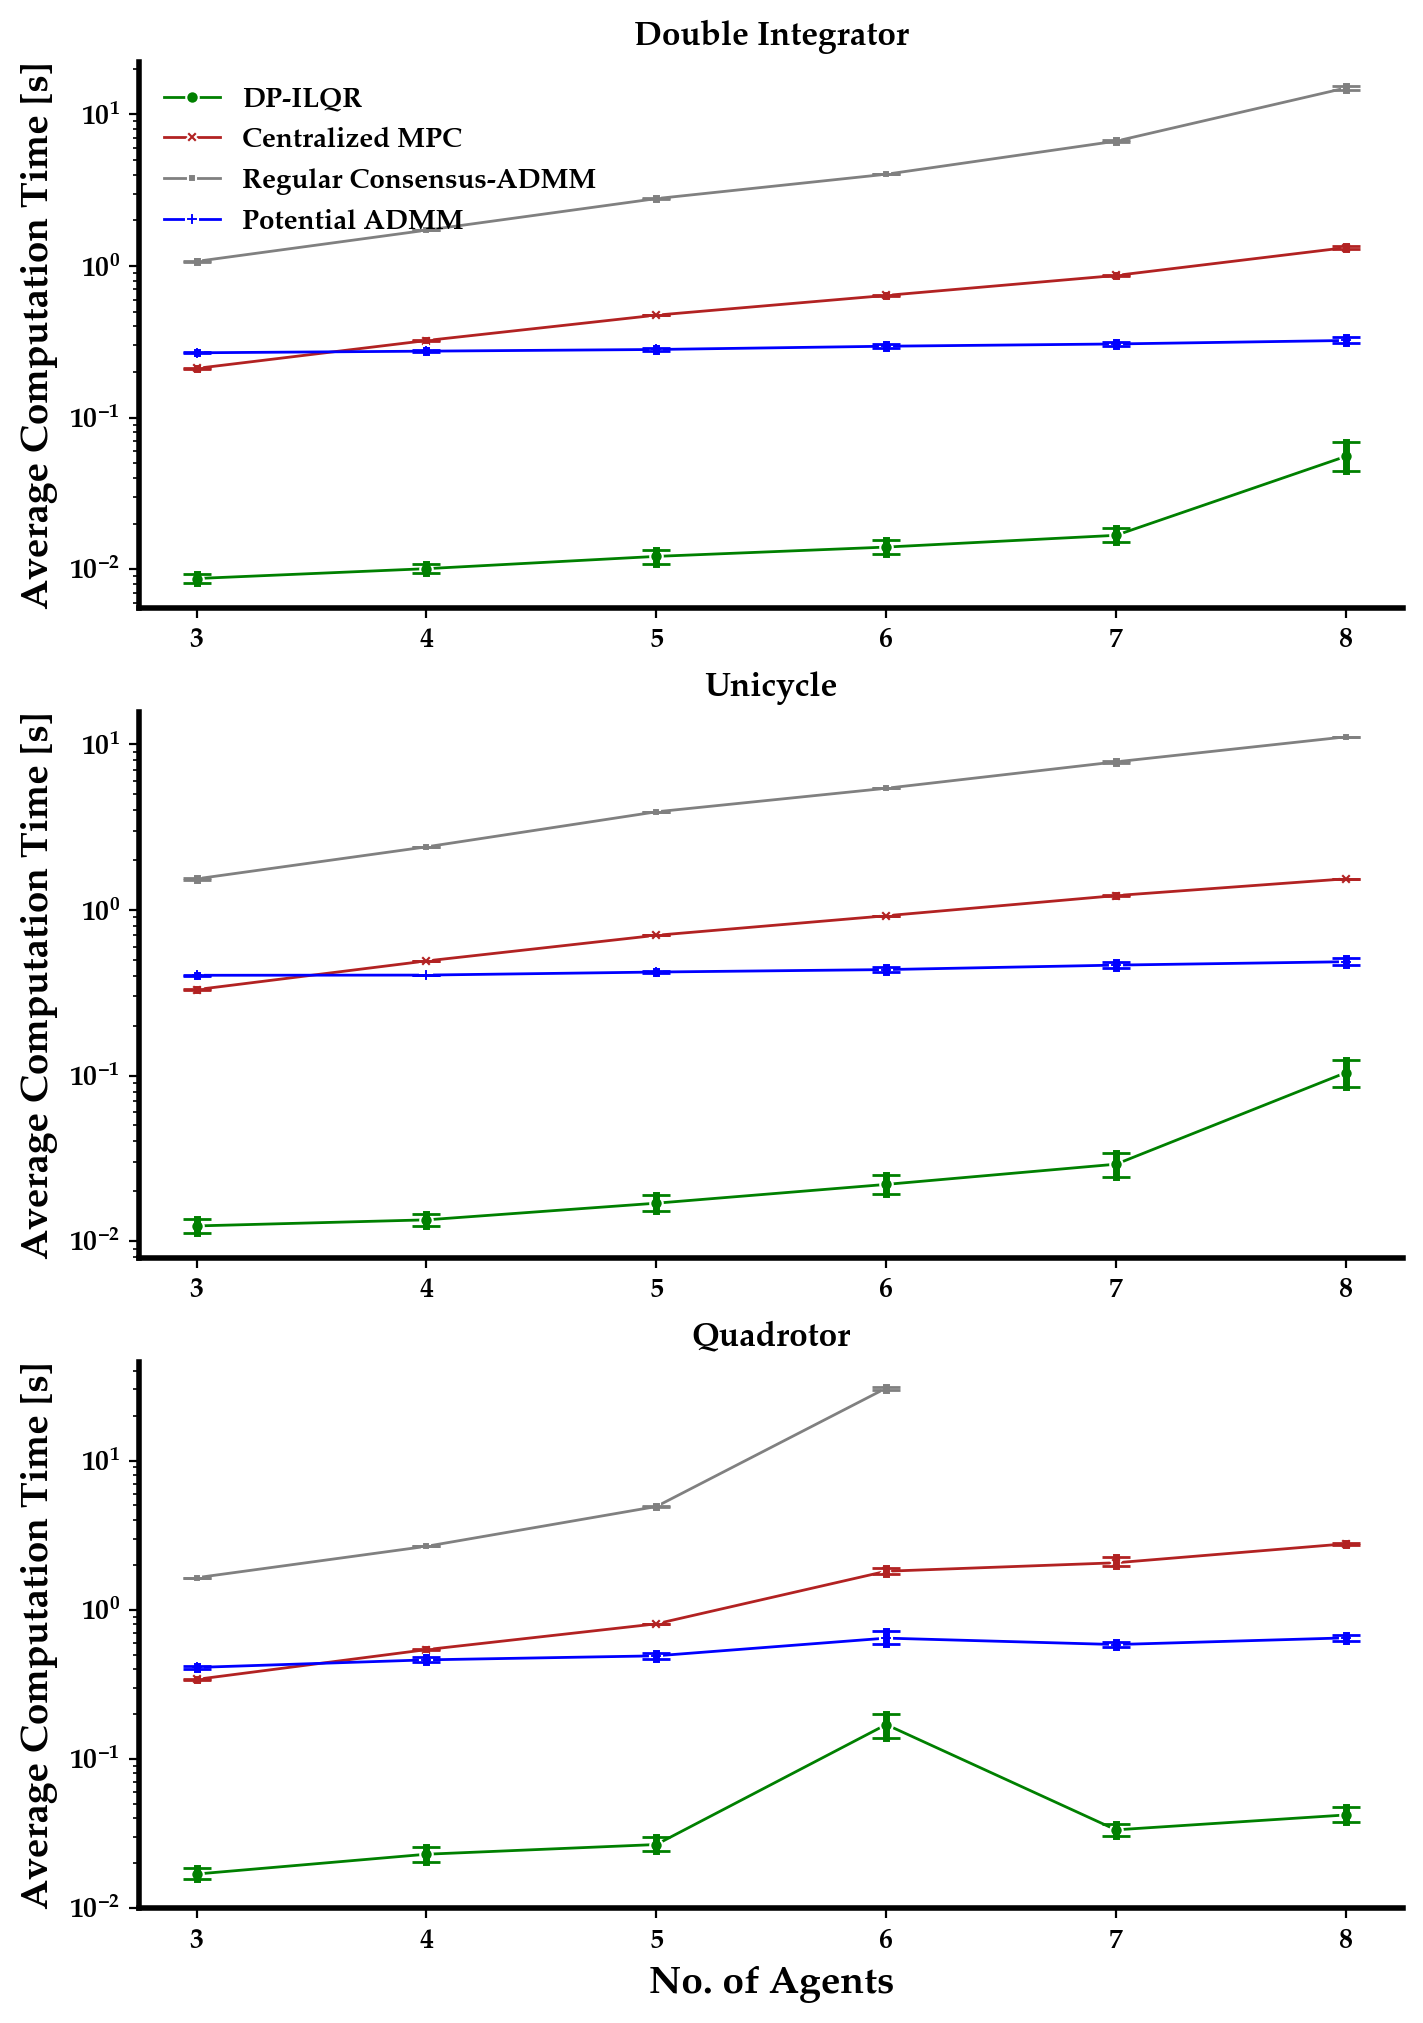

In [147]:
fig, axes = plt.subplots(3, 1, figsize=(7, 10), dpi=200)
err_kws = {'capsize': 5, 'capthick': 1, 'elinewidth': 2.5}

# Plot data for Double Integrator
sns.lineplot(data=double_int_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
             dashes=False, markers=True, markersize=4.5, palette=["green", "firebrick", "grey", "blue"],
             err_style='bars', err_kws=err_kws, ax=axes[0])
axes[0].set_title('Double Integrator', fontname=font_family, fontsize=12, weight='bold')
axes[0].set_yscale('log')  # Set y-axis to logarithmic scale
axes[0].set_yticks([0.01, 0.1, 1, 10])  # Set specific y-tick locations
axes[0].set_xlabel('') 
# Plot data for Unicycle
sns.lineplot(data=unicycle_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
             dashes=False, markers=True, markersize=4.5, palette=["green", "firebrick", "grey", "blue"],
             err_style='bars', err_kws=err_kws, ax=axes[1])
axes[1].set_title('Unicycle', fontname=font_family, fontsize=12, weight='bold')
axes[1].set_yscale('log')  # Set y-axis to logarithmic scale
axes[1].set_yticks([0.01, 0.1, 1, 10])  # Set specific y-tick locations
axes[1].set_xlabel('') 
# Plot data for Quadrotor
sns.lineplot(data=quadrotor_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
             dashes=False, markers=True, markersize=4.5, palette=["green", "firebrick", "grey", "blue"],
             err_style='bars', err_kws=err_kws, ax=axes[2])
axes[2].set_title('Quadrotor', fontname=font_family, fontsize=12, weight='bold')
axes[2].set_yscale('log')  # Set y-axis to logarithmic scale
axes[2].set_yticks([0.01, 0.1, 1, 10])  # Set specific y-tick locations
axes[2].set_xticks([3, 4, 5, 6, 7, 8]) 
# Customize plot appearance
# Customize plot appearance
font = FontProperties(family=font_family, weight='bold')
for ax in axes:
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylabel('Average Computation Time [s]', fontname=font_family, fontsize=14, weight='bold')
    ax.legend().set_visible(False)  # Remove legend for all sub-figures
for ax in axes.flatten():
    ax.yaxis.get_offset_text().set_font_properties(font)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname(font_family) for label in labels]
    [label.set_fontweight('bold') for label in labels]
    
# Add legend only to the first sub-figure
axes[0].legend(labels=['DP-ILQR', 'Centralized MPC', 'Regular Consensus-ADMM', 'Potential ADMM'], frameon=False,
               prop={'family': font_family, 'weight': 'bold', 'size': 10})
font = FontProperties(family=font_family, weight='bold')
axes[-1].yaxis.get_offset_text().set_font_properties(font)
axes[-1].set_xlabel('No. of Agents', fontname=font_family, fontsize=14, weight='bold')

# Save the figure
plt.savefig('results/avg_computation_times_comparison.png', bbox_inches='tight', dpi=300, facecolor=axes[0].get_facecolor())

#### Optimality gaps of DP-ILQR, regular ADMM, and potential ADMM

In [291]:
optimality_df = pd.read_excel('logs/ICRA2024_Monte_Carlo.xlsm', sheet_name='Sheet1')

In [292]:
optimality_df.columns

Index(['trial', 'dynamics', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std'],
      dtype='object')

In [299]:
# Define the range of agent numbers
agent_numbers = [3, 4, 5, 6, 7, 8]  # Add more agent numbers as needed

# Define the dynamics models
dynamics_models = ['double_int', 'unicycle', 'quadrotor']

# Create a dictionary to store the results
results = {}

# Loop through dynamics models
for dynamics_model in dynamics_models:
    dynamics_results = {}  # Dictionary to store results for the current dynamics model
    # Loop through agent numbers
    for n_agents in agent_numbers:
        if n_agents <= 6:
            sova_admm_values = [True, 'DP-ILQR', False]
        else:
            sova_admm_values = [True, 'DP-ILQR']  
        # Loop through SOVA_admm values
        for sova_admm_value in sova_admm_values:
            key = f'{dynamics_model}_{n_agents}_{sova_admm_value}'.replace(" ", "_").lower()
            numerator = optimality_df[(optimality_df['n_agents'] == n_agents) & (optimality_df['SOVA_admm'] == sova_admm_value)]['obj_trj'].values - \
                        optimality_df[(optimality_df['n_agents'] == n_agents) & (optimality_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            denominator = optimality_df[(optimality_df['n_agents'] == n_agents) & (optimality_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            result = numerator / denominator * 100
            dynamics_results[key] = result
    # Store the results for the current dynamics model in the main results dictionary
    results[dynamics_model] = dynamics_results


# Now, the results dictionary contains variables for different combinations of agent numbers, SOVA_admm values, and dynamics models
# You can access them like this:
for dynamics_model, dynamics_results in results.items():
    for key, value in dynamics_results.items():
        print(f'{dynamics_model}: {key}, {value}')

ValueError: operands could not be broadcast together with shapes (179,) (180,) 

KeyError: 'double_int'

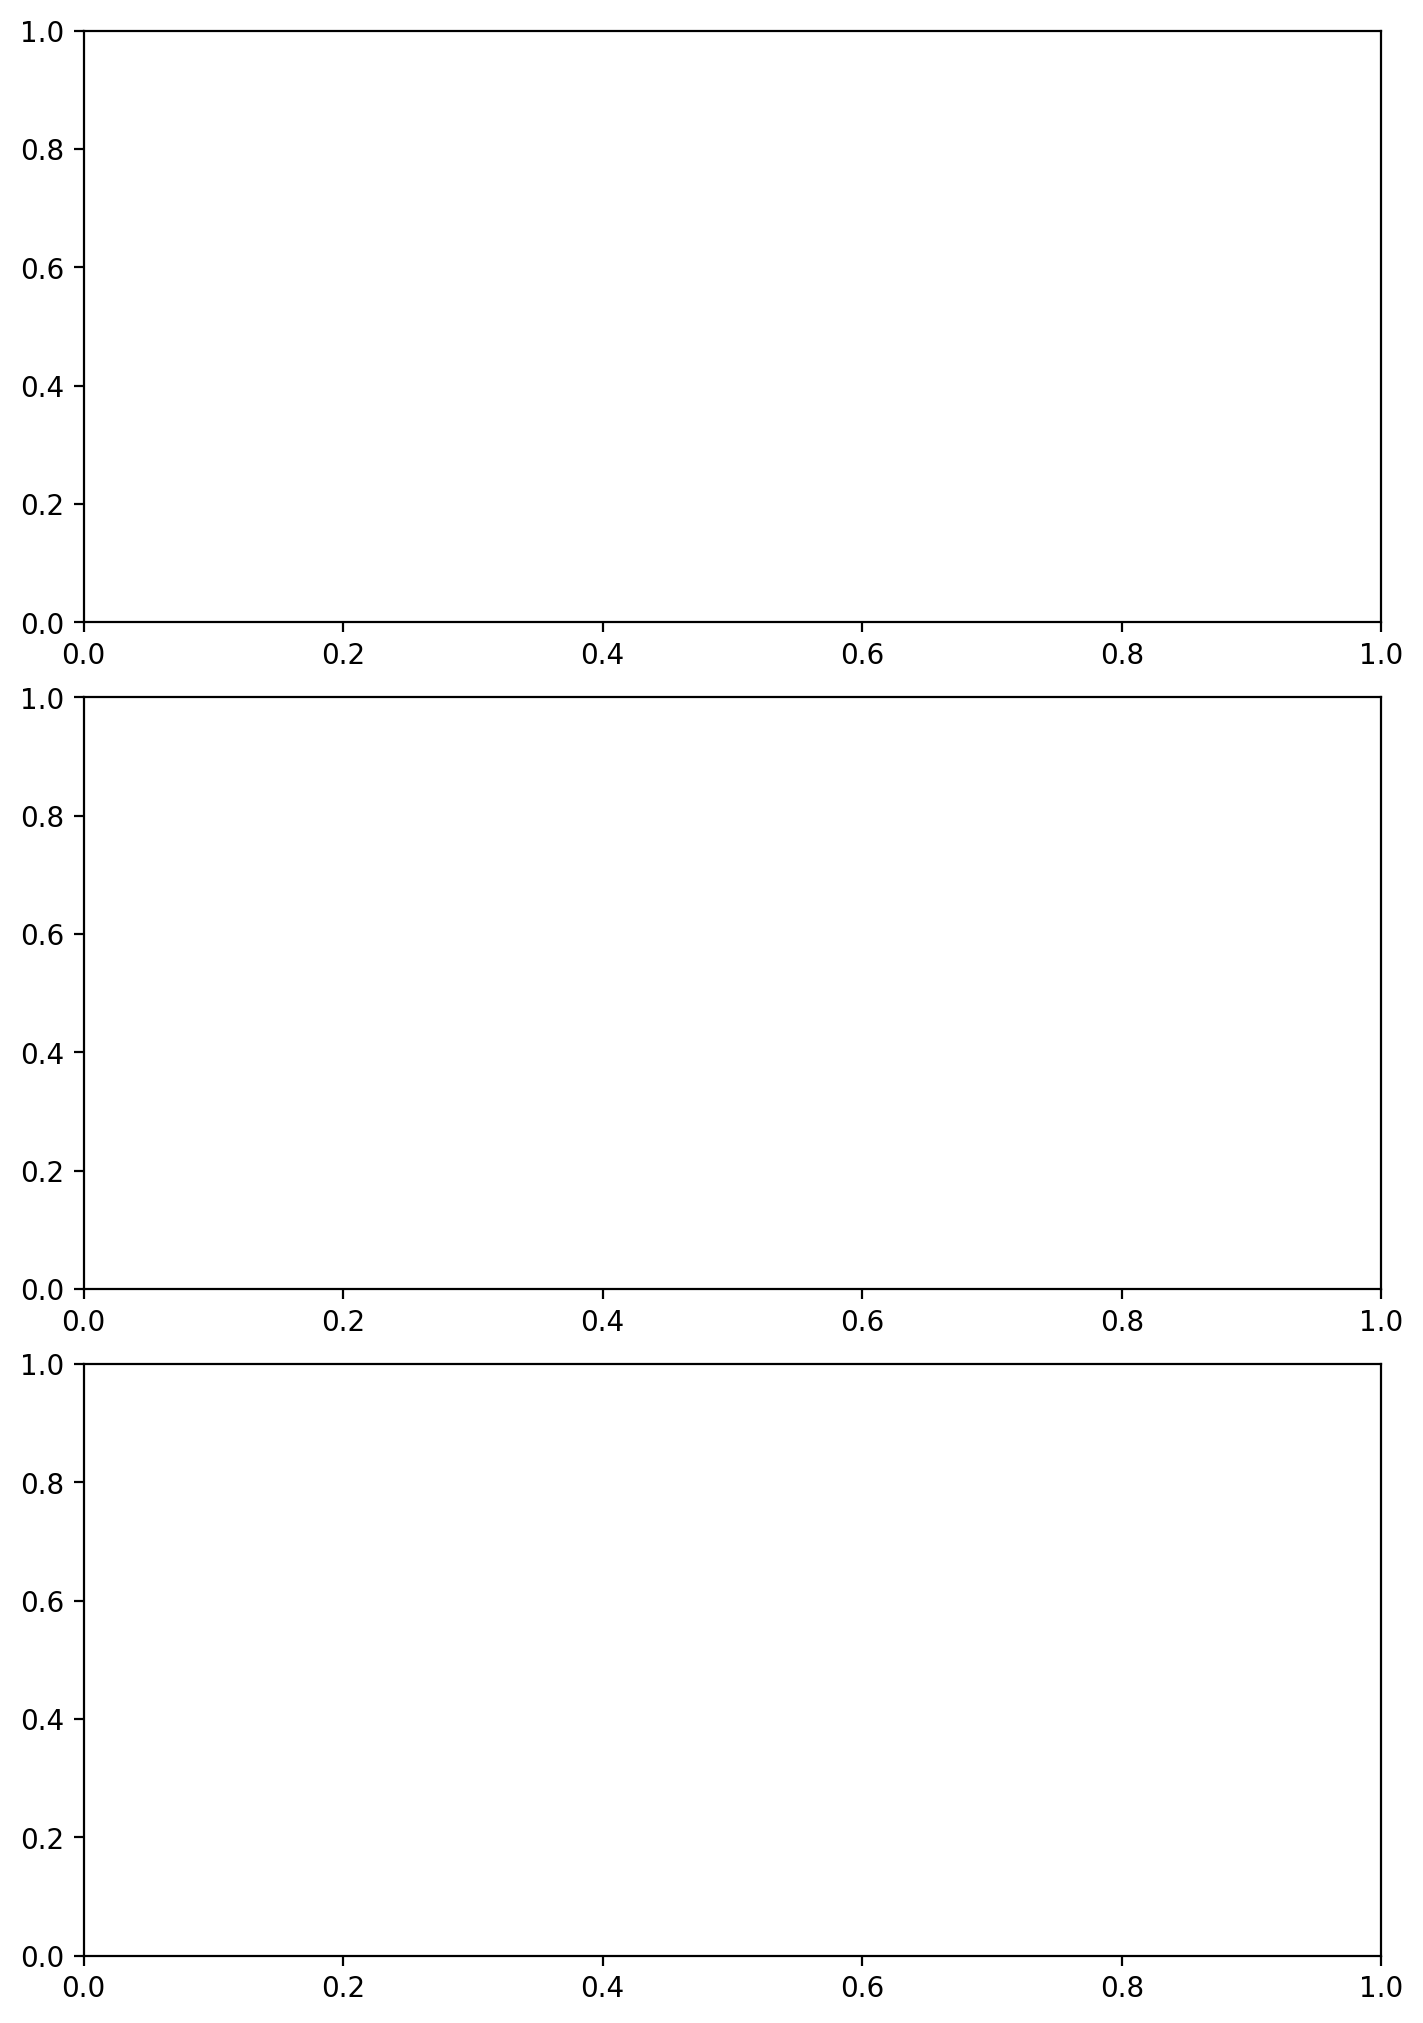

In [267]:
# Create subplots for each dynamics model in one row and multiple columns
fig, axes = plt.subplots(len(dynamics_models), 1, figsize=(7, 10), dpi=200)

# Set Palatino LT font family and bold fonts
font_family = 'Palatino LT'
font = FontProperties(family=font_family, weight='bold')

# Define color palette with three distinct colors
# color_palette = sns.color_palette("tab10")[:3]
colors = ['blue','orange','red']

# Loop through dynamics models and plot boxplots
for i, dynamics_model in enumerate(dynamics_models):
    dynamics_results = results[dynamics_model]
    
    # Create a DataFrame for the current dynamics model
    df = pd.DataFrame.from_dict(dynamics_results, orient='index').transpose()
    df = df[df>=1e-3]
    # Plot a boxplot for the current dynamics model using the defined color palette
    sns.boxplot(data=df, ax=axes[i], showfliers=False, palette=colors, width=0.6)
    
    # Set the title for the sub-figure
    # axes[i].set_title(dynamics_model.capitalize(), fontname=font_family, fontsize=14, weight='bold')
    
    # Set y-axis label
    axes[i].set_ylabel('Relative Optimality Gaps [%]', fontname=font_family, fontsize=12, weight='bold')
    axes[i].set_yscale('log')
    # Remove x-axis ticks and labels
    axes[i].set_xticks([])
    axes[i].set_xlabel('')
    
    # Customize tick labels
    labels = axes[i].get_yticklabels()
    [label.set_fontname(font_family) for label in labels]
    [label.set_weight('bold') for label in labels]
    
    # Adjust box positions to group by clusters
    n_clusters = len(dynamics_results) // 3
    cluster_width = (box_width + cluster_spacing) * n_clusters
    box_positions = np.arange(0, cluster_width * len(dynamics_results), cluster_width)
    
    # Update box positions
    for patch, position in zip(axes[i].artists, box_positions):
        patch.set_x(position)
    
axes[0].set_title('Double Integrator',fontname=font_family, fontsize=14, weight='bold')
axes[1].set_title('Unicycle',fontname=font_family, fontsize=14, weight='bold')
axes[2].set_title('Quadrotor',fontname=font_family, fontsize=14, weight='bold')


# Add legends for the three dynamics models to each sub-figure
for i, dynamics_model in enumerate(dynamics_models):
    # Create a list of labels for the legends
    legend_labels = ['Potential ADMM','DP-ILQR','Regular ADMM']
    handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in zip(legend_labels,colors )]
    # Plot legends
axes[0].legend(handles, legend_labels, loc='best', frameon=False, prop={'family': font_family, 'weight': 'bold'})
    

# Show the plot
plt.show()

In [220]:
### Plotting the optimality gaps


In [ ]:
agents_3_60trials_ilqr = agents_3_60trials_ilqr[agents_3_60trials_ilqr >= 0]
agents_4_60trials_ilqr = agents_4_60trials_ilqr[agents_4_60trials_ilqr >= 0]
agents_5_60trials_ilqr = agents_5_60trials_ilqr[agents_5_60trials_ilqr >= 0]
agents_6_60trials_ilqr = agents_6_60trials_ilqr[agents_6_60trials_ilqr >= 0]
agents_7_60trials_ilqr = agents_7_60trials_ilqr[agents_7_60trials_ilqr >= 0]
agents_8_60trials_ilqr = agents_8_60trials_ilqr[agents_8_60trials_ilqr >= 0]


In [712]:
agents_3_60trials_sova = agents_3_60trials_sova[agents_3_60trials_sova >= 0]
agents_4_60trials_sova = agents_4_60trials_sova[agents_4_60trials_sova >= 0]
agents_5_60trials_sova = agents_5_60trials_sova[agents_5_60trials_sova >= 0]
agents_6_60trials_sova = agents_6_60trials_sova[agents_6_60trials_sova >= 0]
agents_7_60trials_sova = agents_7_60trials_sova[agents_7_60trials_sova >= 0]
agents_8_60trials_sova = agents_8_60trials_sova[agents_8_60trials_sova >= 0]

In [713]:
# agents_3_60trials_sova = reject_outliers_2(agents_3_60trials_sova, m=1.5)
# agents_4_60trials_sova = reject_outliers_2(agents_4_60trials_sova, m=1.5)
# agents_5_60trials_sova = reject_outliers_2(agents_5_60trials_sova, m=1.5)
# agents_6_60trials_sova = reject_outliers_2(agents_6_60trials_sova, m=1.5)
# agents_7_60trials_sova = reject_outliers_2(agents_7_60trials_sova, m=1.5)
# agents_8_60trials_sova = reject_outliers_2(agents_8_60trials_sova, m=1.5)

In [714]:
# agents_3_60trials_ilqr = reject_outliers_2(agents_3_60trials_ilqr, m=2)
# agents_4_60trials_ilqr = reject_outliers_2(agents_4_60trials_ilqr, m=2)
# agents_5_60trials_ilqr = reject_outliers_2(agents_5_60trials_ilqr, m=2)
# agents_6_60trials_ilqr = reject_outliers_2(agents_6_60trials_ilqr, m=2)
# agents_7_60trials_ilqr = reject_outliers_2(agents_7_60trials_ilqr, m=2)
# agents_8_60trials_ilqr = reject_outliers_2(agents_8_60trials_ilqr, m=2)

In [715]:
relative_gap_admm = np.hstack((agents_3_60trials_sova ,agents_4_60trials_sova ,agents_5_60trials_sova ,
                               agents_6_60trials_sova ,agents_7_60trials_sova ,agents_8_60trials_sova ,
                               agents_3_60trials_ilqr ,agents_4_60trials_ilqr ,agents_5_60trials_ilqr ,
                               agents_6_60trials_ilqr ,agents_7_60trials_ilqr ,agents_8_60trials_ilqr))*100

In [716]:
n_agents = np.hstack(([3]*agents_3_60trials_sova.size,
                      [4]*agents_4_60trials_sova.size, 
                      [5]*agents_5_60trials_sova.size, 
                      [6]*agents_6_60trials_sova.size, 
                      [7]*agents_7_60trials_sova.size, 
                      [8]*agents_8_60trials_sova.size,
                      [3]*agents_3_60trials_ilqr.size,
                      [4]*agents_4_60trials_ilqr.size, 
                      [5]*agents_5_60trials_ilqr.size, 
                      [6]*agents_6_60trials_ilqr.size, 
                      [7]*agents_7_60trials_ilqr.size, 
                      [8]*agents_8_60trials_ilqr.size
                      ))

In [717]:
sova_counts = agents_3_60trials_sova.size + agents_4_60trials_sova.size+\
                agents_5_60trials_sova.size + agents_6_60trials_sova.size+\
                  agents_7_60trials_sova.size +   agents_8_60trials_sova.size

In [718]:
sova_counts 

307

In [719]:
ilqr_counts = n_agents.size - sova_counts

In [720]:
ilqr_counts

200

In [721]:
method = np.hstack((['SOVA']*sova_counts,['ilqr']*ilqr_counts))

In [722]:
ilqr_df = pd.DataFrame({'n_agents':n_agents,'relative_gap_admm':relative_gap_admm,'method':method})

In [723]:
optimality_combined_df = ilqr_df

In [724]:
optimality_combined_df.columns

Index(['n_agents', 'relative_gap_admm', 'method'], dtype='object')

In [725]:
font_family

'Palatino LT'

<Figure size 960x720 with 0 Axes>

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

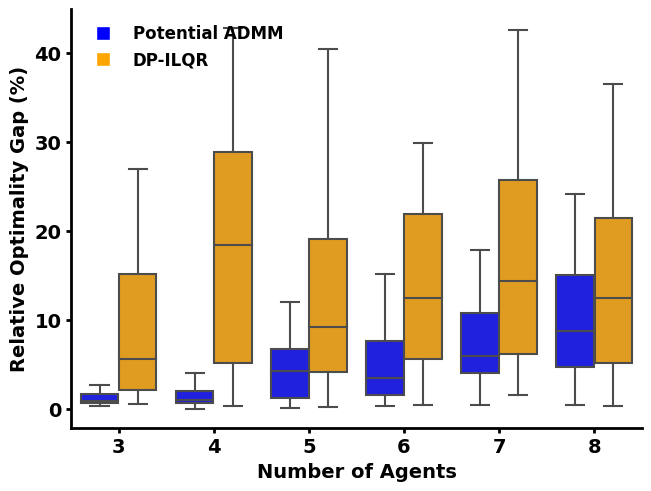

In [732]:
# Create a color palette for the two methods
colors = ['blue', 'orange']

plt.figure(dpi=150)
fig, ax = plt.subplots()

# Explicitly set colors for each method
sns.boxplot(x='n_agents', y='relative_gap_admm', data=optimality_combined_df, ax=ax, hue='method',
            palette=colors, showfliers=False)
sns.despine(right=True)

# Increase linewidth of bottom and left spines
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick width
ax.tick_params(width=2.0)

# Increase label and tick font sizes
plt.xticks(fontname=font_family, size=14, weight='bold')
plt.yticks(fontname=font_family, size=14, weight='bold')

plt.ylabel('Relative Optimality Gap (%)', fontname=font_family, fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname=font_family, fontsize=14, weight='bold')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Create a custom legend with boxes
legend_labels = ['Potential ADMM', 'DP-ILQR']
handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in zip(legend_labels, colors)]
plt.legend(loc='upper left',handles=handles, frameon=False, prop={'family': font_family, 'weight': 'bold', 'size': 12})

# Show the plot (optional)
plt.show()

In [733]:
optimality_stats = optimality_combined_df.groupby(['n_agents','method']).agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,method,mean %,std %
0,3,SOVA,2.200801,3.973997
1,3,ilqr,13.131487,17.202176
2,4,SOVA,1.779774,1.762729
3,4,ilqr,19.821043,19.187270
4,5,SOVA,5.037403,4.946410
5,5,ilqr,15.124626,17.128788
6,6,SOVA,6.354908,7.515514
7,6,ilqr,28.671215,80.376557
8,7,SOVA,8.108640,6.860123
9,7,ilqr,23.753049,36.171639
